In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [12]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/z2.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           25 non-null     object 
 1   Net migration                     25 non-null     float64
 2   GDP ($ per capita)                25 non-null     float64
 3   Population                        25 non-null     int64  
 4   Electricity per person            25 non-null     float64
 5   workersQUANT                      25 non-null     float64
 6   budget_for_research_science       25 non-null     float64
 7   workersQUANT2                     25 non-null     float64
 8   researchers_high_edu_sector       25 non-null     float64
 9   researchers_priv_nonprof_sector   25 non-null     float64
 10  weigh_m

In [13]:
del df['Population']
df

Country  Net migration  GDP ($ per capita)  \
0              Australia           3.98             29000.0   
1                Austria           2.00             30000.0   
2                Belgium           1.23             29100.0   
3                 Brazil          -0.03              7600.0   
4                 Canada           5.96             29800.0   
5                  China          -0.40              5000.0   
6         Czech Republic           0.97             15700.0   
7                Denmark           2.48             31100.0   
8                 France           0.66             27600.0   
9                Germany           2.18             27600.0   
10                 India          -0.07              2900.0   
11                Israel           0.68             19800.0   
12                 Italy           2.07             26700.0   
13                 Japan           0.00             28200.0   
14           Netherlands           2.91             28600.0   
15                Norway           1.74             37800.0   
16                Poland          -0.49             11100.0   
17          South Africa          -0.29             10700.0   
18           South Korea           0.00             17800.0   
19                 Spain           0.99             22000.0   
20                Turkey           0.00              6700.0   
21               Ukraine          -0.39              5400.0   
22  United Arab Emirates           1.03             23200.0   
23        United Kingdom           2.19             27700.0   
24         United States           3.41             37800.0   

    Electricity per person  workersQUANT  budget_for_research_science  \
0                 0.012661  3.503441e+04                   711.794681   
1                 0.008343  1.197623e+04                   371.765493   
2                 0.008240  9.785154e+03                   497.739784   
3                 0.003078  3.503441e+04                   724.128184   
4                 0.020165  3.503441e+04                  2383.369664   
5                 0.004675  1.486131e+06                   566.228943   
6                 0.008139  1.182203e+04                   205.366998   
7                 0.005600  3.503441e+04                   408.241115   
8                 0.009136  7.991204e+04                  1803.247329   
9                 0.007876  3.503441e+04                  3831.160019   
10                0.001308  3.503441e+04                   724.128184   
11                0.010544  3.727342e+04                   318.023330   
12                0.004985  3.986028e+04                  1717.291993   
13                0.008300  1.691799e+05                  7294.506249   
14                0.006984  3.503441e+04                   736.461686   
15                0.032452  1.749636e+04                   467.096190   
16                0.004324  2.534054e+04                   483.499862   
17                0.005720  1.234347e+04                   724.128184   
18                0.011518  5.397232e+04                  3598.334381   
19                0.006802  4.027153e+04                   839.220602   
20                0.003897  3.279539e+04                   683.908935   
21                0.003523  3.503441e+04                   724.128184   
22                0.049793  3.503441e+04                   724.128184   
23                0.005600  3.503441e+04                  2171.814594   
24                0.014482  3.503441e+04                 25857.015393   

    workersQUANT2  researchers_high_edu_sector  \
0    1.735092e+05                 76383.000000   
1    1.071647e+05                 31609.333333   
2    9.310493e+04                 31156.400000   
3    4.486005e+05                178588.500000   
4    1.735092e+05                 76383.000000   
5    4.288386e+06                515843.666667   
6    8.324315e+04                 20843.800000   
7    8.482952e+04                 25139.900000   
8    5.372431e+05            

In [4]:
df.describe()

Net migration  GDP ($ per capita)  Electricity per person  \
count      25.000000            25.00000               25.000000   
mean        1.312400         21556.00000                0.010326   
std         1.600061         10570.48091                0.010409   
min        -0.490000          2900.00000                0.001308   
25%         0.000000         11100.00000                0.004985   
50%         0.990000         26700.00000                0.007876   
75%         2.180000         29000.00000                0.010544   
max         5.960000         37800.00000                0.049793   

       workersQUANT  budget_for_research_science  workersQUANT2  \
count  2.500000e+01                    25.000000   2.500000e+01   
mean   9.654152e+04                  2342.669126   4.469652e+05   
std    2.911297e+05                  5144.283941   8.430285e+05   
min    9.785154e+03                   205.366998   5.985725e+04   
25%    3.279539e+04                   497.739784   1.209333e+05   
50%    3.503441e+04                   724.128184   1.735092e+05   
75%    3.727342e+04                  1803.247329   4.486005e+05   
max    1.486131e+06                 25857.015393   4.288386e+06   

       researchers_high_edu_sector  researchers_priv_nonprof_sector  \
count                    25.000000                        25.000000   
mean                 111375.333200                      1464.439928   
std                  118392.223401                      2307.199730   
min                    7191.750000                         1.250000   
25%                   31156.400000                       280.500000   
50%                   76383.000000                       519.000000   
75%                  109835.218200                       592.800000   
max                  515843.666667                      9299.500000   

       weigh_money_in_dif_area_research  science_conf_budg_for_one  ...  \
count                      2.500000e+01                  25.000000  ...   
mean                       1.548852e+07                5869.412000  ...   
std                        1.556420e+07               11747.038344  ...   
min                        1.411003e+05                  82.000000  ...   
25%                        4.262753e+06                 997.750000  ...   
50%                        1.080373e+07                2430.950000  ...   
75%                        1.904122e+07                5505.650000  ...   
max                        6.747396e+07               59040.900000  ...   

       Machine Learning  Natural language processing    AI_Index  \
count         25.000000                    25.000000   25.000000   
mean           0.037322                     0.037022   32.601600   
std            0.112218                     0.088676   17.640936   
min            0.000169                     0.000000    9.650000   
25%            0.001421                     0.000673   24.450000   
50%            0.004865                     0.002456   30.360000   
75%            0.016643                     0.008966   36.350000   
max            0.537896                     0.311935  100.000000   

       Patents_by_technology_f  ICT_development_index_f  \
count                25.000000                 25.00000   
mean               4051.152400                  7.17600   
std               12677.034473                  1.49085   
min                   4.670000                  2.65000   
25%                 203.530000                  6.73000   
50%                 676.470000                  7.70000   
75%                2052.750000                  8.20000   
max               63967.520000                  8.80000   

       World_University_Ranking_data_f  Students_Procent  \
count                        25.000000         25.000000   
mean                       1610.495600          0.067789   
std                        2335.220189          0.012512   
min                          41.840000          0.048474   
25%                         3

In [5]:
print('Data shape:', df.shape)
print('Number of Duplicates:', len(df[df.duplicated()]))
print('Number of Missing Values:', df.isnull().sum().sum())

Data shape: (25, 33)
Number of Duplicates: 0
Number of Missing Values: 0


<ipython-input-6-2a368ffba90b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[corr_matrix_feature_list].corr()


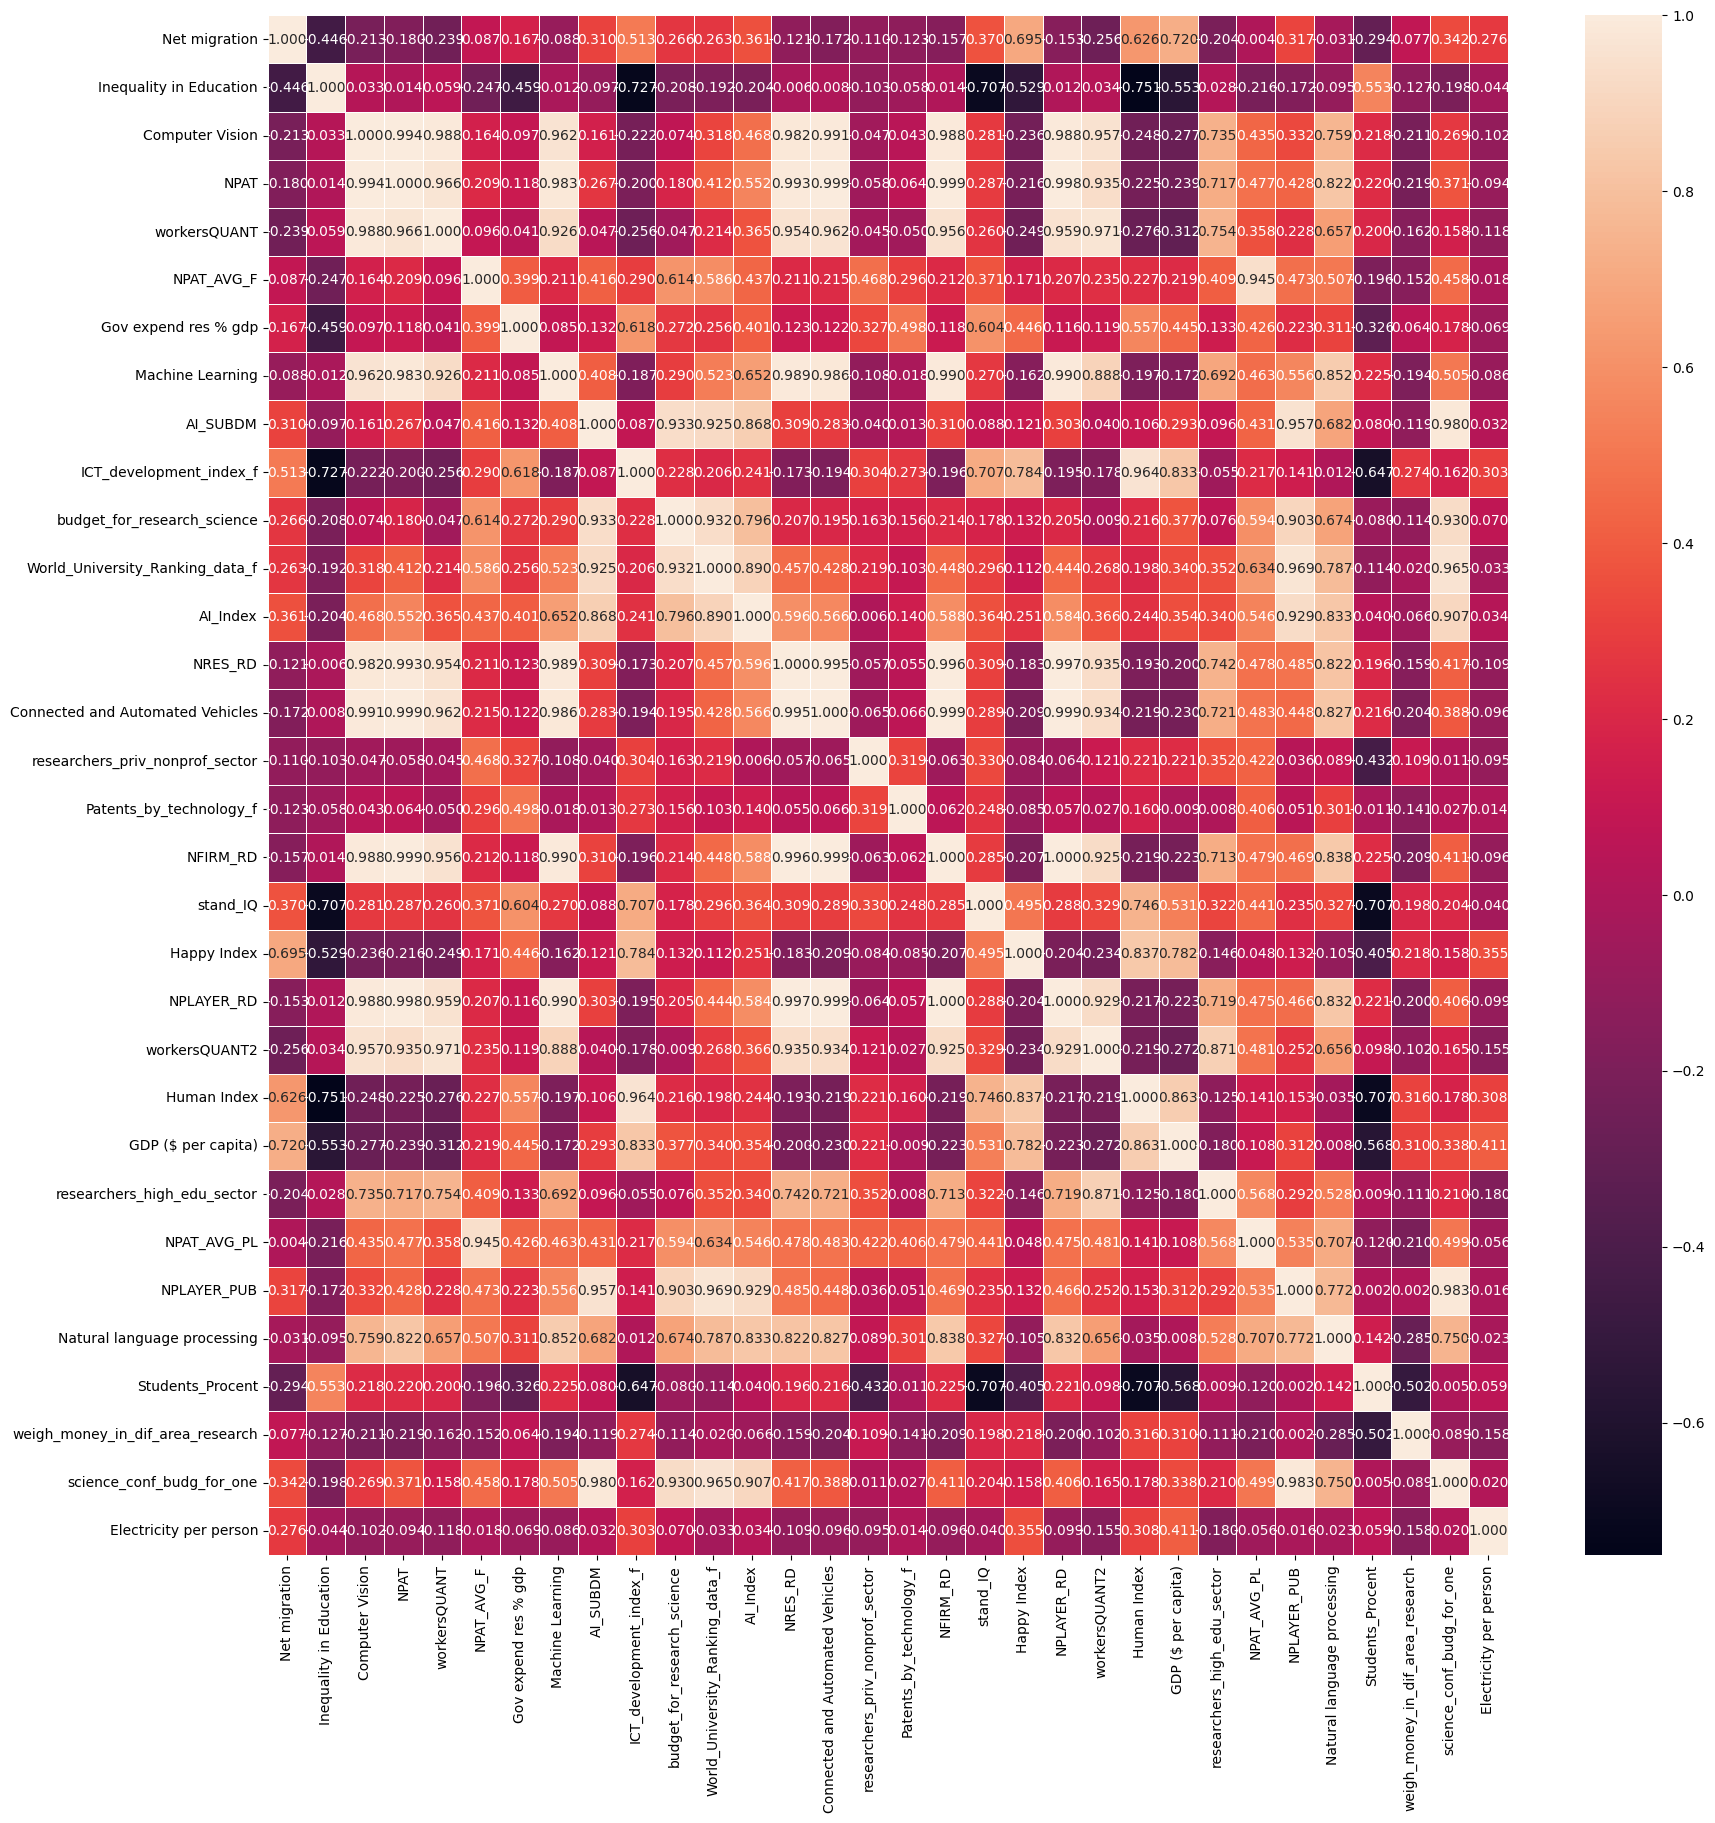

In [6]:
corr_matrix_feature_list = (set(df.columns))
corr_matrix_feature_list = list(corr_matrix_feature_list)
corr_matrix = df[corr_matrix_feature_list].corr()
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True, linewidths = .5, fmt = '.3f', ax = ax)
plt.savefig('corellation.png')
plt.show()

In [7]:
print(corr_matrix_feature_list)

['Net migration', 'Inequality in Education', 'Computer Vision', 'NPAT', 'workersQUANT', 'NPAT_AVG_F', 'Gov expend res % gdp', 'Machine Learning', 'AI_SUBDM', 'ICT_development_index_f', 'budget_for_research_science', 'World_University_Ranking_data_f', 'AI_Index', 'NRES_RD', 'Connected and Automated Vehicles', 'researchers_priv_nonprof_sector', 'Patents_by_technology_f', 'NFIRM_RD', 'stand_IQ', 'Happy Index', 'NPLAYER_RD', 'workersQUANT2', 'Human Index', 'GDP ($ per capita)', 'researchers_high_edu_sector', 'NPAT_AVG_PL', 'NPLAYER_PUB', 'Natural language processing', 'Country', 'Students_Procent', 'weigh_money_in_dif_area_research', 'science_conf_budg_for_one', 'Electricity per person']


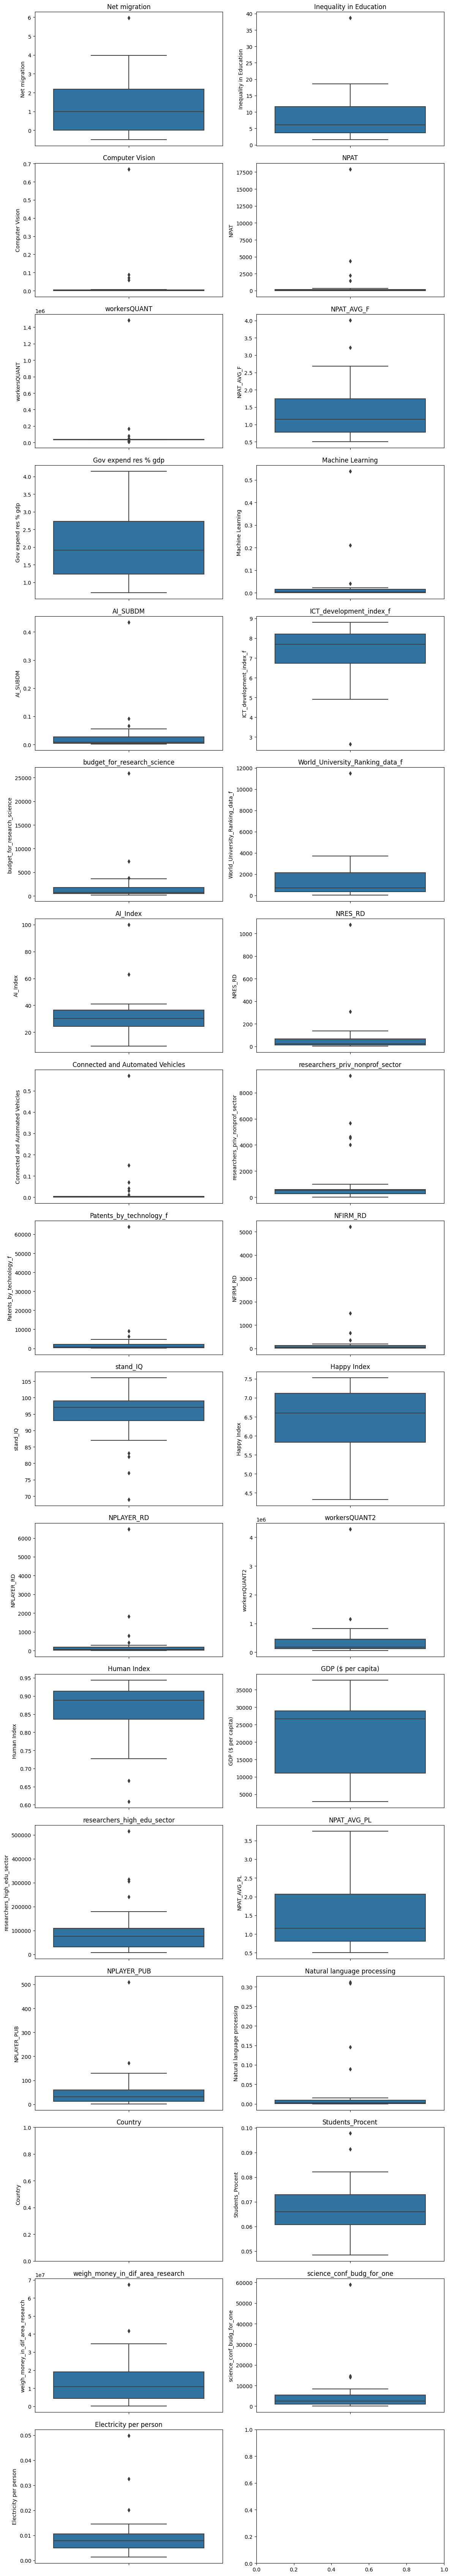

In [8]:

num_features = len(corr_matrix_feature_list)
num_rows = (num_features + 1) // 2
fig, ax = plt.subplots(ncols=2, nrows=num_rows, figsize=(12, 4 * num_rows))

for i, col in enumerate(corr_matrix_feature_list):
    numeric_values = pd.to_numeric(df[col], errors='coerce')
    sns.boxplot(y=numeric_values, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(col)

plt.tight_layout()
plt.savefig('meanwithhvostic.png')
plt.show()

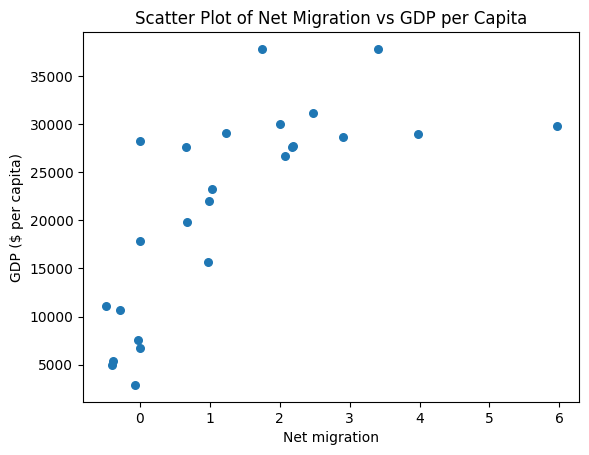

In [14]:
%matplotlib inline
plt.scatter(df['Net migration'], df['GDP ($ per capita)'], s=30)
plt.xlabel('Net migration')
plt.ylabel('GDP ($ per capita)')
plt.title('Scatter Plot of Net Migration vs GDP per Capita')
plt.show()

In [15]:
%matplotlib inline
numerical_columns = df.select_dtypes(include=['float64']).columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plots for Numerical Data', y=1.02)
plt.savefig('pairplots.png')

plt.show()

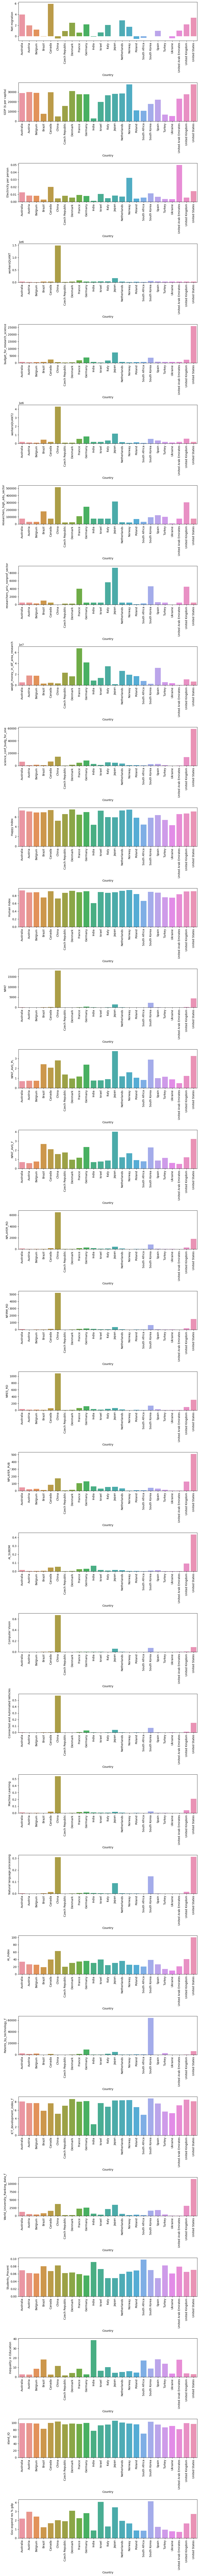

In [16]:
numerical_columns = df.select_dtypes(include=['float64']).columns
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))

for i, k in enumerate(numerical_columns):
    sns.barplot(x='Country', y=k, data=df, ax=axes[i])
    axes[i].set_ylabel(k)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('diagramforeach.png')
plt.show()

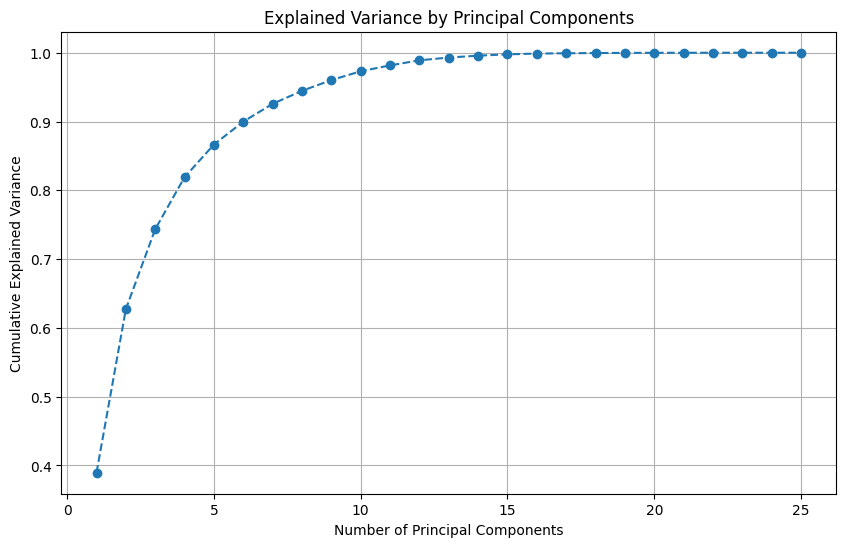

In [23]:
numerical_columns = df.select_dtypes(include=['float64']).columns
X = df[numerical_columns]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.savefig('explanedv.png')

plt.show()
#print(X_standardized)
#rint(X_pca)

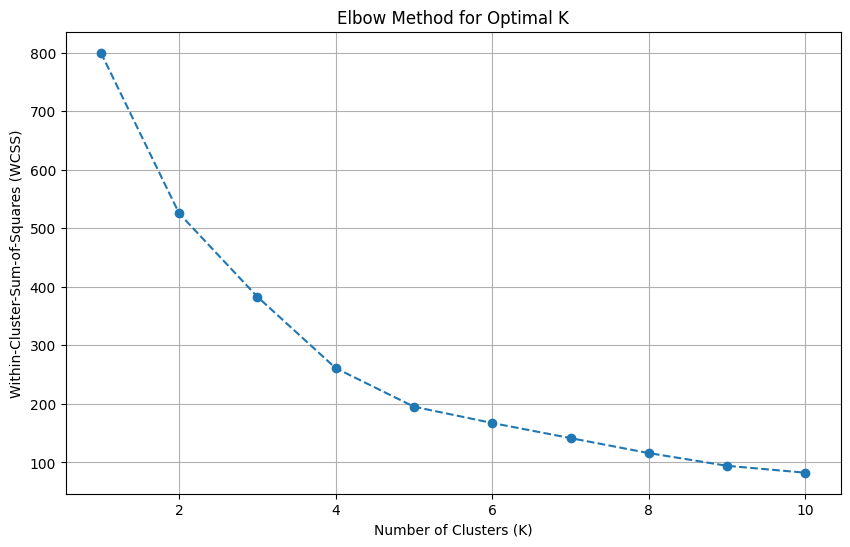

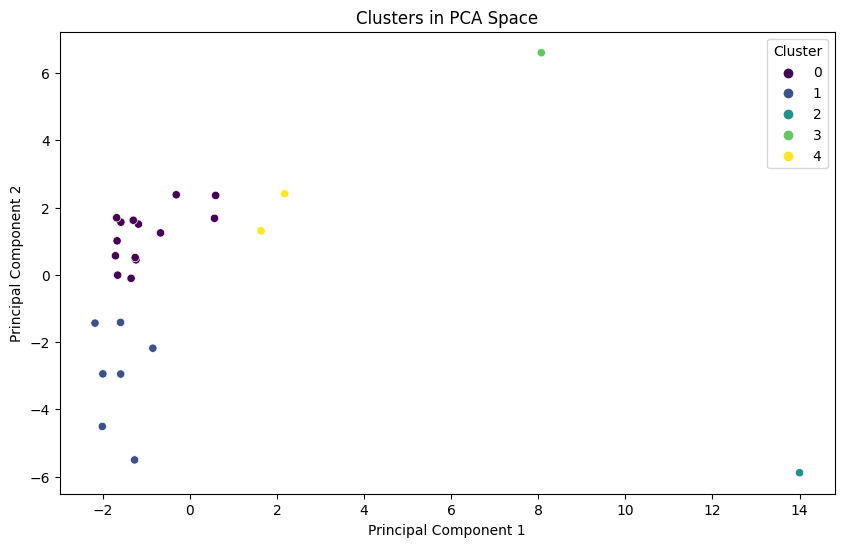

In [24]:
numerical_columns = df.select_dtypes(include=['float64']).columns
X = df[numerical_columns]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3, n_init=42, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=3, n_init=42, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


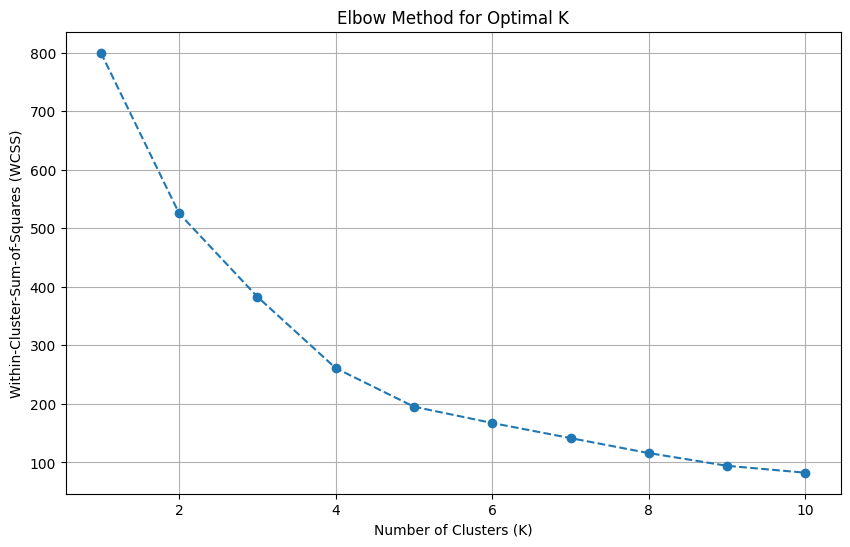

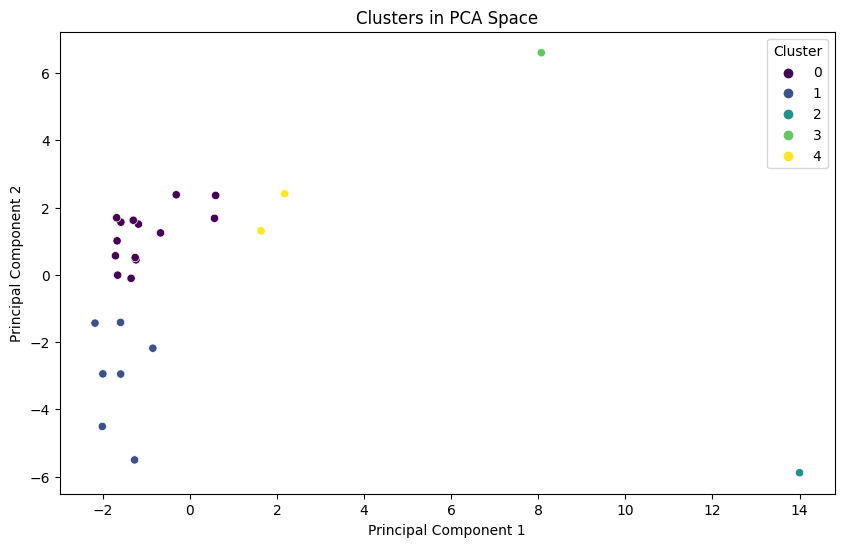

Cluster Sizes:
0    0.56
1    0.28
4    0.08
2    0.04
3    0.04
Name: Cluster, dtype: float64


In [25]:
numerical_columns = df.select_dtypes(include=['float64']).columns
X = df[numerical_columns]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3, n_init=42, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=3, n_init=42, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Calculate cluster sizes and normalize by total number of elements
cluster_sizes = df['Cluster'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("Cluster Sizes:")
print(cluster_sizes)



Results for StandardScaler:
Silhouette Score: 0.1037876117368671


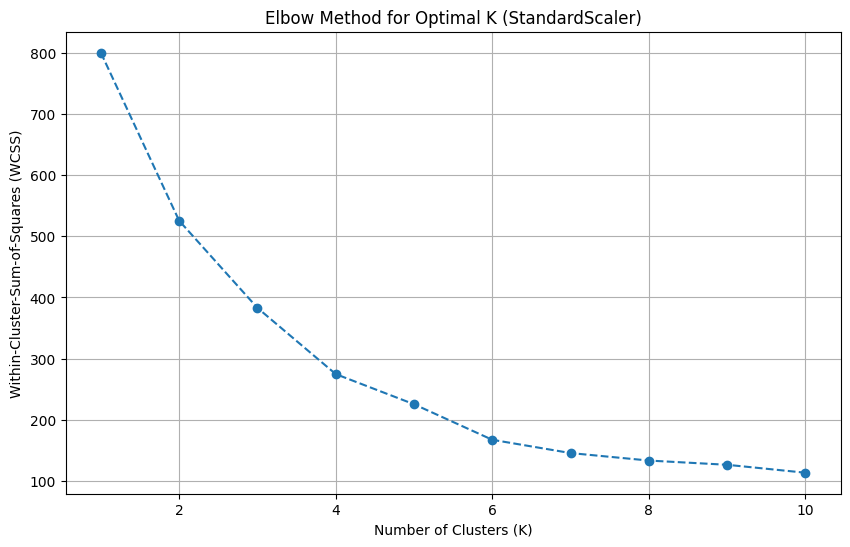

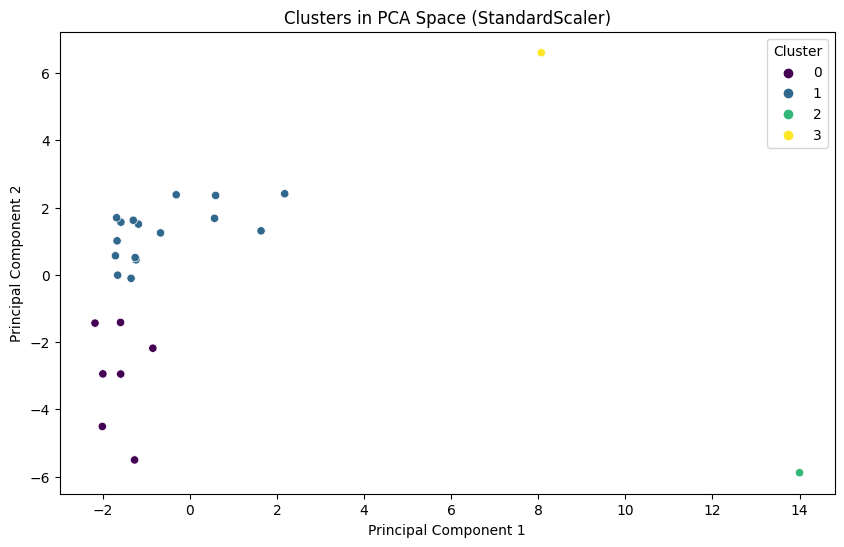

Cluster Sizes (StandardScaler):
1    0.64
0    0.28
2    0.04
3    0.04
Name: Cluster, dtype: float64

Results for RobustScaler:
Silhouette Score: 0.14603605259625863


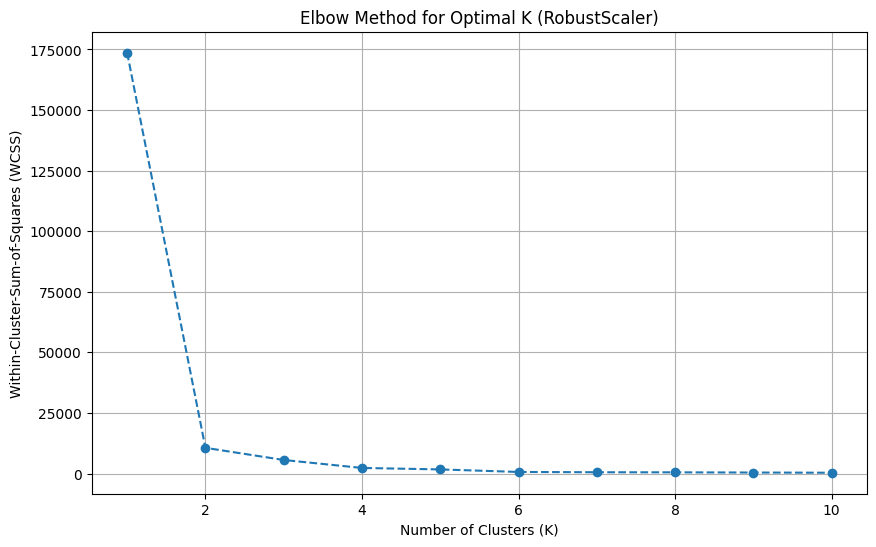

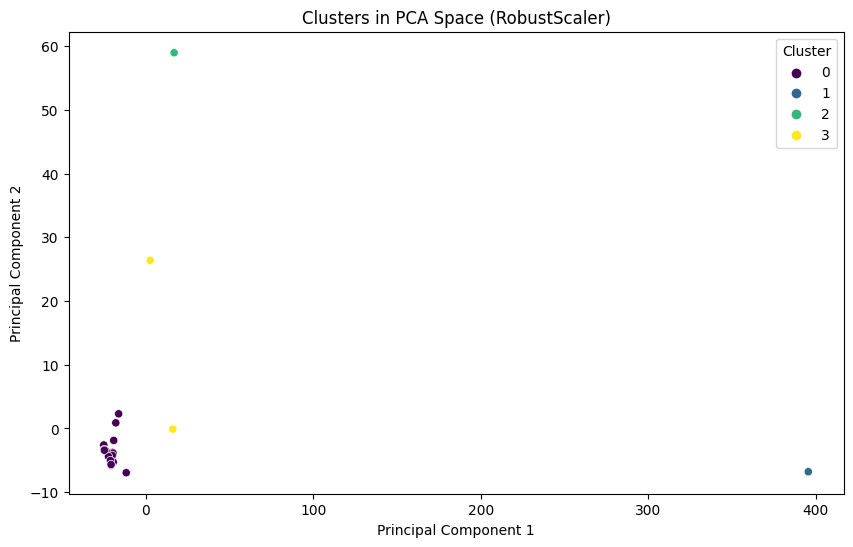

Cluster Sizes (RobustScaler):
0    0.84
3    0.08
1    0.04
2    0.04
Name: Cluster, dtype: float64

Results for MinMaxScaler:
Silhouette Score: 0.06757463349091823


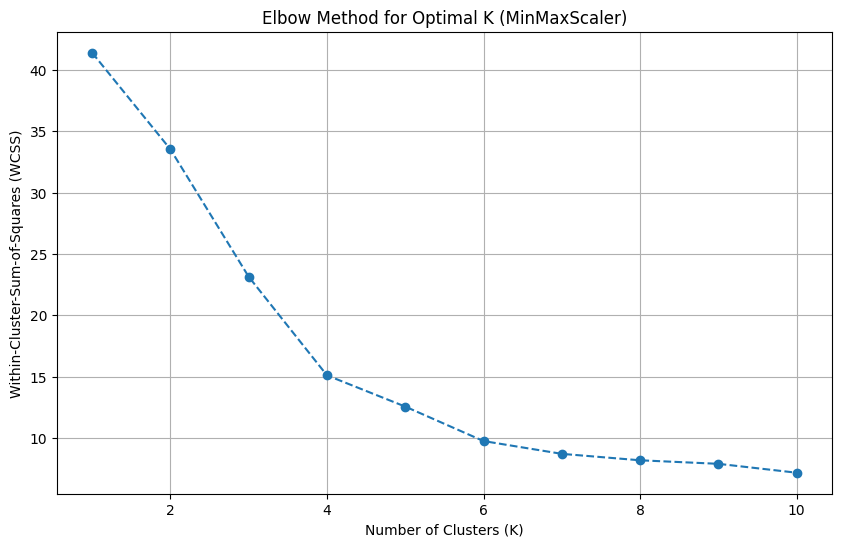

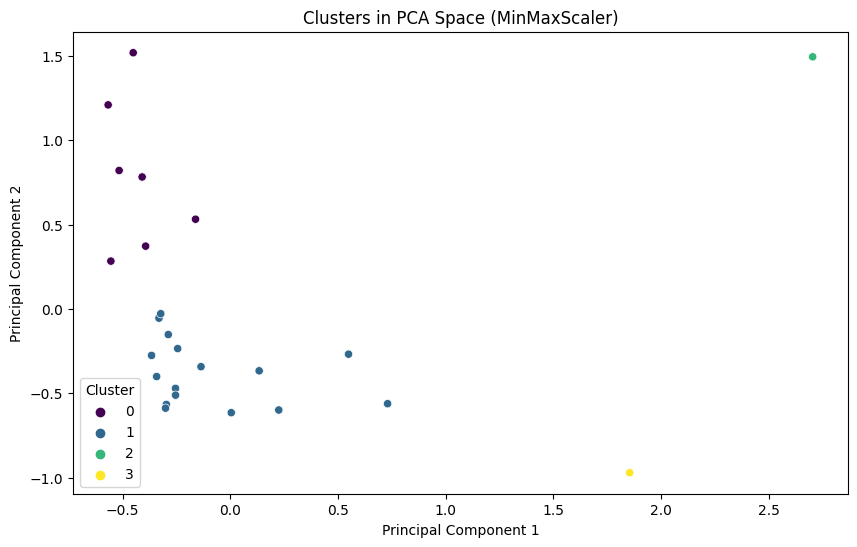

Cluster Sizes (MinMaxScaler):
1    0.64
0    0.28
2    0.04
3    0.04
Name: Cluster, dtype: float64

Results for MaxAbsScaler:
Silhouette Score: 0.16809871732209672


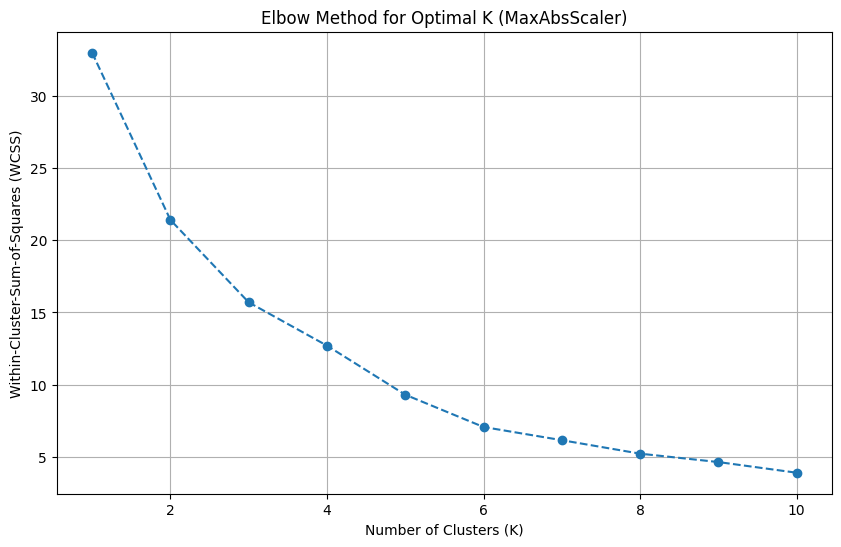

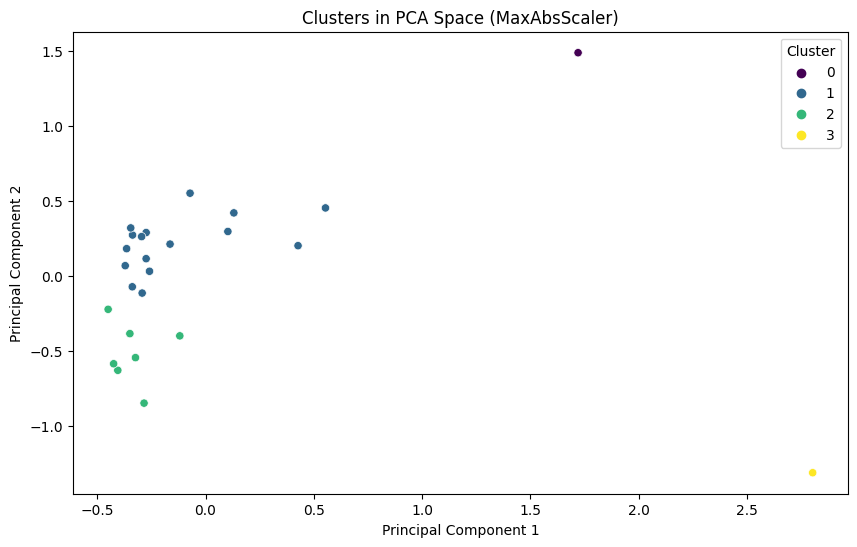

Cluster Sizes (MaxAbsScaler):
1    0.64
2    0.28
3    0.04
0    0.04
Name: Cluster, dtype: float64


In [27]:
numerical_columns = df.select_dtypes(include=['float64']).columns
X = df[numerical_columns]

scalers = {
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3, n_init=1, random_state=0)
        kmeans.fit(X_pca)
        wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    print(f"\nResults for {scaler_name}:")
    print(f"Silhouette Score: {silhouette_avg}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
    plt.title(f'Elbow Method for Optimal K ({scaler_name})')
    plt.grid(True)
    plt.show()

    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=3000, n_init=10, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_pca)

    cluster_sizes = df['Cluster'].value_counts(normalize=True)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
    plt.title(f'Clusters in PCA Space ({scaler_name})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    print(f"Cluster Sizes ({scaler_name}):")
    print(cluster_sizes)



Results for MinMaxScaler:
Silhouette Score: 0.06757463349091823


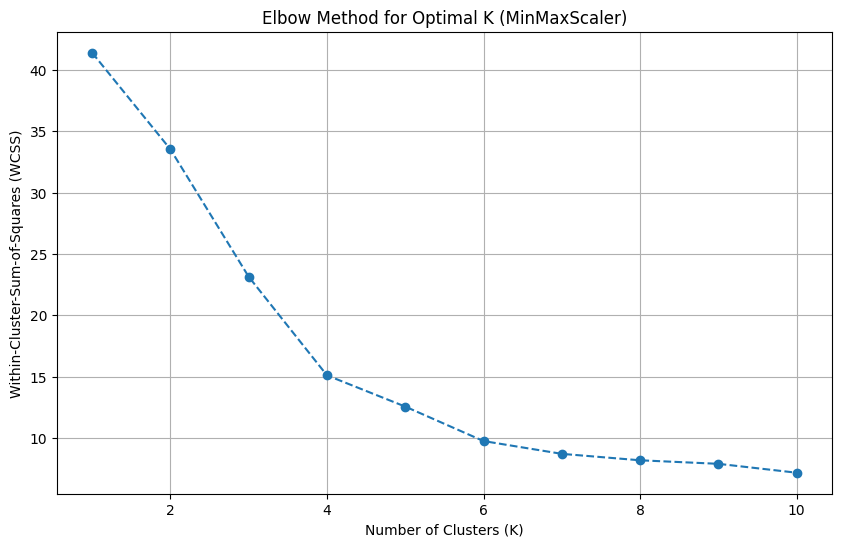

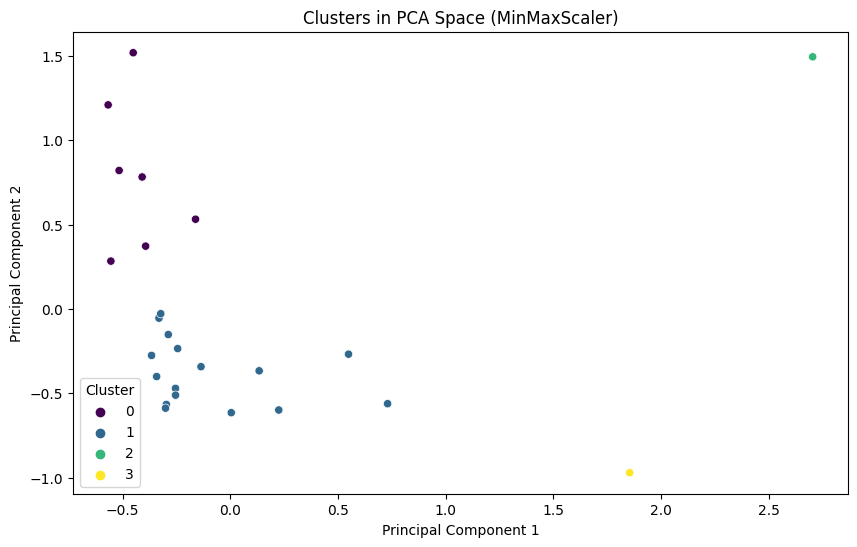


Cluster Sizes (MinMaxScaler):
1    0.64
0    0.28
2    0.04
3    0.04
Name: Cluster, dtype: float64

Cluster Information:
                 Country  Cluster
0              Australia        1
1                Austria        1
2                Belgium        1
3                 Brazil        0
4                 Canada        1
5                  China        2
6         Czech Republic        1
7                Denmark        1
8                 France        1
9                Germany        1
10                 India        0
11                Israel        1
12                 Italy        1
13                 Japan        1
14           Netherlands        1
15                Norway        1
16                Poland        0
17          South Africa        0
18           South Korea        1
19                 Spain        1
20                Turkey        0
21               Ukraine        0
22  United Arab Emirates        0
23        United Kingdom        1
24         United States   

In [28]:
Y = df.copy()
# del Y['GDP ($ per capita)']
# del Y['weigh_money_in_dif_area_research']
# del Y['NPAT_AVG_F']
# del Y['Gov expend res % gdp']

numerical_columns = Y.select_dtypes(include=['float64']).columns
X = Y[numerical_columns]

scalers = {
    #'StandardScaler': StandardScaler(),
    #'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    #'MaxAbsScaler': MaxAbsScaler()
}

for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3, n_init=1, random_state=0)
        kmeans.fit(X_pca)
        wcss.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

    print(f"\nResults for {scaler_name}:")
    print(f"Silhouette Score: {silhouette_avg}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
    plt.title(f'Elbow Method for Optimal K ({scaler_name})')
    plt.grid(True)


    plt.show()

    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=3000, n_init=10, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_pca)




    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
    plt.title(f'Clusters in PCA Space ({scaler_name})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig('cluster2.png')
    plt.show()

    cluster_sizes = df['Cluster'].value_counts(normalize=True)

    cluster_info = df[['Country', 'Cluster']]
    print(f"\nCluster Sizes ({scaler_name}):")
    print(cluster_sizes)
    print("\nCluster Information:")
    print(cluster_info)
    cluster_sizes = df['Cluster'].value_counts(normalize=True)

    print(f"Cluster Sizes ({scaler_name}):")
    print(cluster_sizes)
